<a href="https://colab.research.google.com/github/maharajabhai/MLProject/blob/main/Autoencoder_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
encodingDimension = 64

In [4]:
inputImage = Input(shape=(784,))
encodedLayer = Dense(encodingDimension, activation = 'relu')(inputImage)
decodedLayer = Dense(784, activation = 'sigmoid')(encodedLayer)

autoencoder = Model(inputImage, decodedLayer)

encoder = Model(inputImage, encodedLayer)

encodedInput = Input(shape = (encodingDimension,))

decodedLayer = autoencoder.layers[-1]

decoder = Model (encodedInput, decodedLayer(encodedInput))


In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train, epochs = 150, batch_size = 400, shuffle = True, 
                validation_data = (x_test, x_test))

In [24]:
encodedImgs = encoder.predict(x_test)
decodedImgs = decoder.predict(encodedImgs)


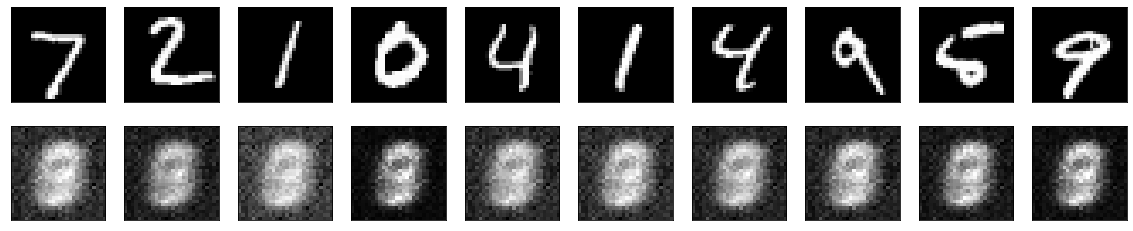

In [27]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax= plt.subplot(2, n, i+1+n)
  plt.imshow(decodedImgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()